## <span style="color:#EC407A"> *Chi calculator* </span> </br>
Magnetic susceptibility of a substance is called volume suceptibility and can be understood as the sumation of the inidividual molar susceptibility. </br>
In this nb, an initial calculation of a simple 4 compartment model of air is used to compute the volume susceptibility of air. </br>
Molar susceptibility $\chi _m$ = $\kappa * M/\rho$ </br>
Where kappa is the volume susceptibility, M is the molar mass and rho the mass density


Assuming the air is composed of 78% of N2 // 21% of O2 // 0.93% of Ar & 0.033% of Carbon Dioxide in inspired air </br>
Expired air changes the volume percentage per compound </br>

The composition of air is unchanged until elevation of approximately 10.000 m

*Values and theory: from CRC Handbook of chemistry and Physics (2003) and Engineering ToolBox (2001) [online] Available at: https://www.engineeringtoolbox.com*

### Molar masses $M$

In [49]:
mol_mass_N2 = 28.013
mol_mass_O2 = 31.99
mol_mass_Ar = 39.948
mol_mass_CO2 = 44.010

### Density $\rho$

In [2]:
rho_N2 = 1.7837
rho_O2 = 1.305 # at 295K & 1 bar
rho_Ar = 1.7837
rho_CO2 = 1.820 # at 295K & 1 bar

### Molar susceptibility $\chi_m$

In [37]:
import numpy as np
chi_m_N2 = -12 #/ 4 *np.pi
chi_m_O2 = 3449 #* 4 *np.pi
chi_m_Ar = -19.32# * 4 *np.pi
chi_m_CO2 = -21 #* 4 *np.pi
chi_m_vapor = -13 # * 4 *np.pi # Assumption, chi of liquid water at 293 K is -12.96 and -12.1 at 373 in gas form

### Volume fraction

In [1]:
vol_N2_insp = 78.08/100 # Percentage in air in the atmosphere
vol_N2_exp = 76/100 # After breathing

vol_O2_insp = 20.95/100
vol_O2_exp = 15.3/100 # After breathing

vol_Ar = 0.93/100 # Volume does not change during breathing

vol_CO2_insp= 0.00412/100
vol_CO2_exp = 4.2/100 # After breathing from: https://www.engineeringtoolbox.com/human-air-d_186.html

vol_vapor_insp = 1.2/100
vol_vapor_exp = 6.1/100 # Inside, after breathing

## <span style="color:lime"> *Equation and Chi calculation* </span> 

In [87]:
# Temperature in CGS and SI is Kelvin
press = 0.1 # CGS is Barye (in SI is Pa) // 1 Pa = 1e-5 Bar (use below pressures are correct)
press_SI = 101.325*1e3 # This is 1 atm in kilo Pascals
press_CGS = 1.01325 *1e6 # This is in Bar

r = 8.31446261815324 # This is in SI units [J], in CGS:
r_CGS = r *1e7 # in CGS is erg/deg-mol
press_inside_CGS = 1.02 *1e6# For 3 mmHg when expiring [Pa]
press_inside_SI = 102*1e3
press_inside_mmHg = 3

temp_outside = 295 # 22 celcius in Kelvin
temp_inside = 310 # Temperature of air inside 37 Celsius in kelvin


In [82]:
chi_air_insp_mol = (vol_N2_insp*chi_m_N2) + (vol_O2_insp*chi_m_O2) + (vol_Ar*chi_m_Ar) + (vol_CO2_insp*chi_m_CO2) + (vol_vapor_insp*chi_m_vapor)

chi_air_insp_eff = chi_air_insp_mol * 1 * press_CGS/(r_CGS*temp_outside) 

print("Inspiration air in CGS: ", chi_air_insp_eff , "ppm")

Inspiration air in CGS:  0.029448574863485694 ppm


In [83]:
#Now calculate in SI
chi_air_insp_eff_SI = chi_air_insp_mol *4*np.pi* 1e-6 * press_SI/(r*temp_outside)  
print("Inspiration air in SI: ", chi_air_insp_eff_SI , "ppm")

Inspiration air in SI:  0.37006170579926284 ppm


In [90]:
# For expiration
chi_air_exp_mol = (vol_N2_exp*chi_m_N2) + (vol_O2_exp*chi_m_O2) + (vol_Ar * chi_m_Ar) + (vol_CO2_exp*chi_m_CO2) + (vol_vapor_exp*chi_m_vapor)

chi_air_exp_eff = chi_air_exp_mol * press_inside_CGS / (r_CGS*temp_inside)  


print("Expiration air in CGS: ", chi_air_exp_eff , "ppm")

Expiration air in CGS:  0.020448502911884884 ppm


In [92]:
chi_air_exp_eff_SI = chi_air_exp_mol *4*np.pi* 1e-6 * press_inside_SI/(r*temp_outside) 
print("Expired air in SI: ", chi_air_exp_eff_SI , "ppm")

Expired air in SI:  0.2700294050537625 ppm


## <span style="color:gold"> *Susceptibility from permittivity* </span> 

In [46]:
perm_CSF = 84 # They don't specify order of magnitude
perm_free_space = 8.854 # This in F/m, this should be e-12 
chi_CSF = (perm_CSF - 1)/(4*pi)

In [24]:
print("Susceptibility of CSF from permittivity: ", chi_CSF)

Susceptibility of CSF from permittivity:  6.604930138313657


In [25]:
# But permittivity is relative to free space right?
relative_chi_CSF = ((perm_CSF/perm_free_space) - 1)/(4*pi)

In [26]:
print("Susceptibility of CSF from relativity permeability: ", relative_chi_CSF)

Susceptibility of CSF from relativity permeability:  0.6753928932450626


### <span style="color:#A049AF"> *4 Cole Cole model calculations* </span> </br>

Model the *permittivity* of space in function of angular frequency </br>

The characterization of said dieletric property can be modeled by contributions at low, medium and high energies. Adding a dispersion regularizer that takes into account the complexity of both structure and composition enables the model for biological material.

$$

{\varepsilon(\omega)} = \varepsilon (\infty ) + \sum_{n}^{} \frac{\Delta \varepsilon_n}{1 + {j\omega \tau_n}^{1-\alpha_n}} + \frac{\sigma_i}{\varepsilon_0} 

$$

In [ ]:
e_inf_lung = 2.4



delta_e1_n = 18
delta_e2_n = 500
delta_e3_n = 2.5e5
delta_e4_n = 4e7

tau1_n = 7.96 # pico seconds e-12
tau2_n = 63.66 # nano seconds e-9
tau3_n = 159.15 # micro seconds e-6
tau4_n = 7.958 # milli seconds e-3

alf_1 = 0.1
alf_2 = 0.1
alf_3 = 0.2
alf_4 = 0


In [81]:
sigma_i_lung = 0.03
sigma_i_muscle = 0.2
sigma_i_blood = 0.7

# Remember this should be e-12 F/m but if we use that in the equation the graph doesn't follow expected values
perm_free_space = 8.854

conductivity_term_lung =  (sigma_i_lung / perm_free_space) 

conductivity_term_muscle =  (sigma_i_muscle / perm_free_space) 

conductivity_term_blood =  (sigma_i_blood / perm_free_space) 

print("Conductivity term - Lung : ", conductivity_term_lung)

print("Conductivity term - Muscle : ", conductivity_term_muscle)


print("Conductivity term - Blood : ", conductivity_term_blood)

Conductivity term - Lung :  0.00338829907386492
Conductivity term - Muscle :  0.022588660492432803
Conductivity term - Blood :  0.0790603117235148


In [82]:
import numpy as np
import matplotlib.pyplot as plt

e_inf_lung = 2.4
e_inf_muscle = 4.0
e_inf_blood = 4.0

delta_e_lung = np.array([18, 500, 2.5e5, 4e7])
delta_e_muscle = np.array([50, 7e3, 1.2e6, 2.5e7])
delta_e_blood = np.array([56, 5.2e3, 0, 0])

tau_n_lung = np.array([7.96e-12, 63.66e-9, 159.15e-6, 7.958e-3])
tau_n_muscle = np.array([7.23e-12, 353.68e-9, 318.31e-6, 2.274e-3])
tau_n_blood = np.array([8.38e-12, 132.63e-9, 0, 0])

alpha_n_lung = np.array([0.1, 0.1, 0.2, 0])  # Note: alpha_4 = 0
alpha_n_muscle = np.array([0.1, 0.1, 0.1, 0])  # Note: alpha_4 = 0
alpha_n_blood = np.array([0.1, 0.1, 0, 0]) # Note, terms 3 and 4 are 0

freq = np.logspace(1, 10, 500) # This should be from 10 Hz to 10 GHz
omega = freq

epsilon_sum_lung = np.sum(delta_e_lung[:, None] / (1 + (1j * omega * tau_n_lung[:, None])**(1 - alpha_n_lung[:, None])), axis=0)
epsilon_sum_muscle = np.sum(delta_e_muscle[:, None] / (1 + (1j * omega * tau_n_muscle[:, None])**(1 - alpha_n_muscle[:, None])), axis=0)
epsilon_sum_blood = np.sum(delta_e_blood[:, None] / (1 + (1j * omega * tau_n_blood[:, None])**(1 - alpha_n_blood[:, None])), axis=0)

epsilon_w_lung = e_inf_lung + epsilon_sum_lung + conductivity_term_lung
epsilon_w_muscle = e_inf_muscle + epsilon_sum_muscle + conductivity_term_muscle
epsilon_w_blood = e_inf_blood + epsilon_sum_blood + conductivity_term_blood

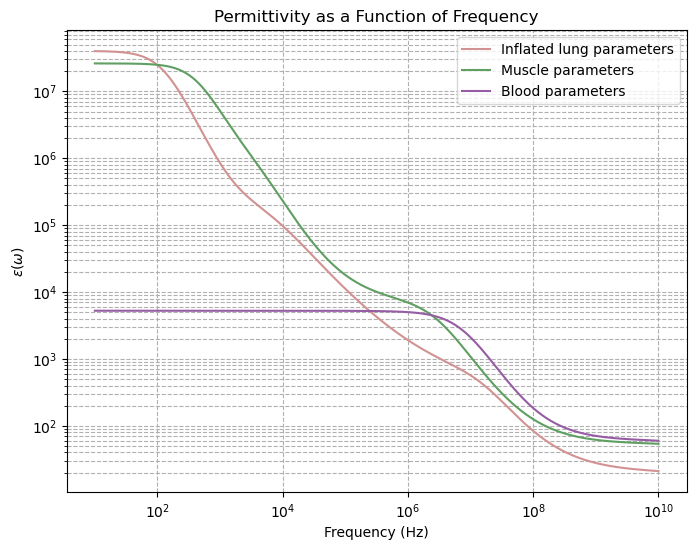

In [84]:
# Plot results
plt.figure(figsize=(8, 6))
plt.semilogx(freq, epsilon_w_lung.real, label='Inflated lung parameters', color = "#D29292")
plt.semilogx(freq, epsilon_w_muscle.real, label='Muscle parameters', color = "#5F9F62")
plt.semilogx(freq, epsilon_w_blood.real, label='Blood parameters', color = "#965CA4")
#plt.semilogx(freq, epsilon_w.imag, label='Imaginary Part', linestyle='dashed')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'$\varepsilon(\omega)$')
plt.yscale('log')
plt.title('Permittivity as a Function of Frequency')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()


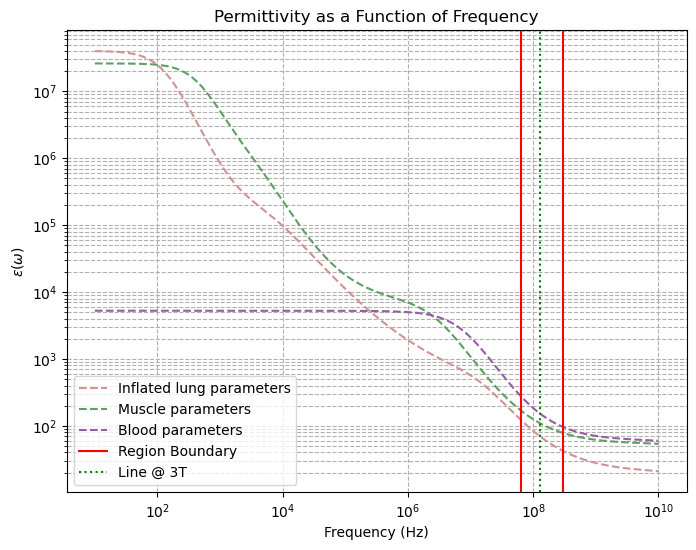

In [93]:
# To select regions of interest in Hz,
# The Gyromagnetic ration of hydrogen protons is 42.58 MHz per tesla
# So if we want to show the 1.5 to 7 Tesla :
larmor_freq = 42.58e6
low_freq = 1.5 * larmor_freq
high_freq = 7 * larmor_freq

mid_freq = 3 * larmor_freq # This one we use to show where is the 3 Tesla line


plt.figure(figsize=(8, 6))
plt.semilogx(freq, epsilon_w_lung.real, label='Inflated lung parameters', color = "#D29292", linestyle='--')
plt.semilogx(freq, epsilon_w_muscle.real, label='Muscle parameters', color = "#5F9F62", linestyle='--')
plt.semilogx(freq, epsilon_w_blood.real, label='Blood parameters', color = "#965CA4", linestyle='--')
#plt.semilogx(freq, epsilon_w.imag, label='Imaginary Part', linestyle='dashed')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'$\varepsilon(\omega)$')
plt.yscale('log')
plt.title('Permittivity as a Function of Frequency')

plt.axvline(x=low_freq, color='red', linestyle='-', label='Region Boundary')
plt.axvline(x=high_freq, color='red', linestyle='-')
plt.axvline(x=mid_freq, color='green', linestyle=':', label='Line @ 3T')

plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()


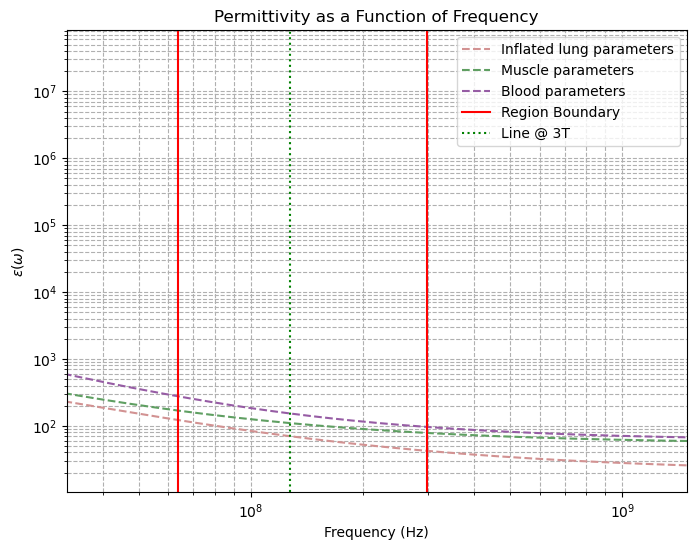

In [102]:
# Now lets try zooming into the picture a bit
# To select regions of interest in Hz,
# The Gyromagnetic ration of hydrogen protons is 42.58 MHz per tesla
# So if we want to show the "y" to "x" Tesla :

zoom_min = low_freq/2
zoom_max = high_freq*5

larmor_freq = 42.58e6
low_freq = 1.5 * larmor_freq
high_freq = 7 * larmor_freq
mid_freq = 3 * larmor_freq # This one we use to show where is the 3 Tesla line


plt.figure(figsize=(8, 6))
plt.semilogx(freq, epsilon_w_lung.real, label='Inflated lung parameters', color = "#D29292", linestyle='--')
plt.semilogx(freq, epsilon_w_muscle.real, label='Muscle parameters', color = "#5F9F62", linestyle='--')
plt.semilogx(freq, epsilon_w_blood.real, label='Blood parameters', color = "#965CA4", linestyle='--')
#plt.semilogx(freq, epsilon_w.imag, label='Imaginary Part', linestyle='dashed')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'$\varepsilon(\omega)$')
plt.yscale('log')
plt.title('Permittivity as a Function of Frequency')

plt.xlim([zoom_min, zoom_max])

plt.axvline(x=low_freq, color='red', linestyle='-', label='Region Boundary')
plt.axvline(x=high_freq, color='red', linestyle='-')
plt.axvline(x=mid_freq, color='green', linestyle=':', label='Line @ 3T')

plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

In [100]:
# Now lets find the value of permittivity of each selected tissue at 3Tesla

idx_3T = np.argmin(np.abs(freq-mid_freq))
epsilon_3T_lung = epsilon_sum_lung[idx_3T]
epsilon_3T_muscle = epsilon_sum_muscle[idx_3T]
epsilon_3T_blood = epsilon_sum_blood[idx_3T]

print(f"Permittivity of Lung @ 3T (Real): {epsilon_3T_lung.real}")
print(f"Permittivity of Muscle @ 3T (Real): {epsilon_3T_muscle.real}")
print(f"Permittivity of Blood @ 3T (Real): {epsilon_3T_blood.real}")

Permittivity of Lung @ 3T (Real): 67.48746425823417
Permittivity of Muscle @ 3T (Real): 105.70435366867665
Permittivity of Blood @ 3T (Real): 148.79006675212767


In [123]:
# Now go again to equation between permittivity and susceptibility
relative_chi_lung = ((epsilon_3T_lung) - 1)/(4*np.pi)
relative_chi_blood = ((epsilon_3T_blood) - 1)/(4*np.pi)
relative_chi_muscle = ((epsilon_3T_muscle) - 1)/(4*np.pi)

In [126]:
print("Electric Susceptibility of Lung from relative permittivity: ", relative_chi_lung.real)
print("ElectricSusceptibility of Muscle from relative permittivity: ", relative_chi_muscle.real)
print("Electric Susceptibility of Blood from relative permittivity: ", relative_chi_blood.real)

Electric Susceptibility of Lung from relative permittivity:  5.290904295171843
ElectricSusceptibility of Muscle from relative permittivity:  8.332107724805958
Electric Susceptibility of Blood from relative permittivity:  11.760759831741147


Magnetic susceptibility of fat: -9.03 </br>
From: https://onlinelibrary.wiley.com/doi/full/10.1002/mrm.27640